Part-I: Linear Regression 

Task 1: Simple Linear Regression 

● Use the scikit-learn library. 
● Load the California Housing Dataset (or any house price dataset). 
● Predict the house price using a single feature (e.g., number of rooms). 
● Train a simple linear regression model. 
● Plot the regression line using matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target


In [3]:

X = df[['AveRooms']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

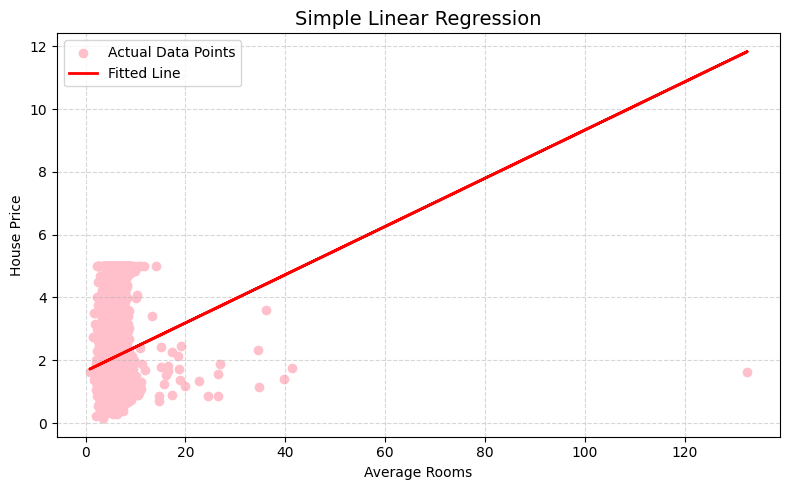

In [5]:
plt.figure(figsize=(8, 5))
plt.title('Simple Linear Regression', fontsize=14)
plt.xlabel('Average Rooms')
plt.ylabel('House Price')

plt.scatter(X_test, y_test, color='pink', label='Actual Data Points')

plt.plot(X_test, y_pred, color='red', linewidth=2, label='Fitted Line')


plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Task 2: Multiple Linear Regression

● Use the same dataset or load another dataset with at least 4 numeric 
features. 
● Predict the target variable using multiple independent variables. 
● Evaluate the model using: 
○ R-squared 
○ Mean Squared Error (MSE) 
○ Root Mean Squared Error (RMSE) 
● Display the coefficients of each feature. 

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

In [7]:

X = df.drop('Target', axis=1)
y = df['Target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
y_pred = mlr_model.predict(X_test)

In [9]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared: 0.5758
MSE: 0.5559
RMSE: 0.7456


In [10]:
feature_weights_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": mlr_model.coef_
})
print(feature_weights_df)


      Feature  Coefficient
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708


Task 3: Feature Scaling and Normalization  and Task 4: Model Interpretation

● Demonstrate the effect of standardizing features using 
StandardScaler. 
● Compare model performance before and after scaling.

● Write Python code to: 
○ Show the correlation matrix using a heatmap. 
○ Identify which features have the strongest relationship with 
the target. 
○ Discuss multicollinearity and how it might affect regression.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)
scaled_model = LinearRegression()
scaled_model.fit(X_train, y_train)

y_pred_scaled = scaled_model.predict(X_test)

In [14]:
r2_after_scaling = r2_score(y_test, y_pred_scaled)
mse_after_scaling = mean_squared_error(y_test, y_pred_scaled)
rmse_after_scaling = np.sqrt(mse_after_scaling)

print("\nAfter Scaling:")
print(f"R-squared: {r2_after_scaling:.4f}")
print(f"MSE: {mse_after_scaling:.4f}")
print(f"RMSE: {rmse_after_scaling:.4f}")




After Scaling:
R-squared: 0.5758
MSE: 0.5559
RMSE: 0.7456


In [15]:
import seaborn as sns

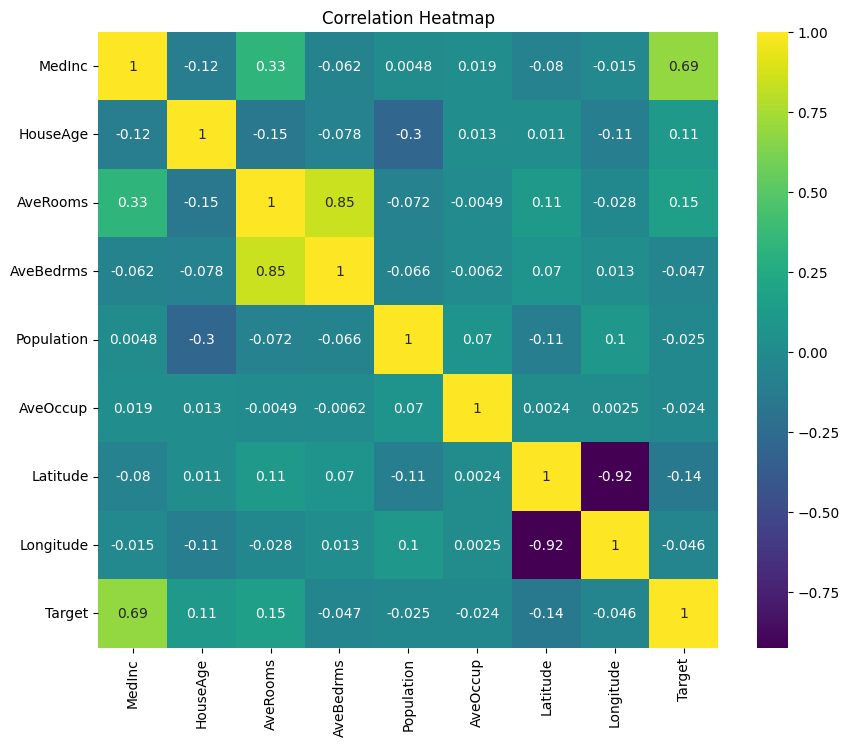

In [16]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


In [17]:
cor_target = corr['Target'].drop('Target').sort_values(key=abs, ascending=False)
print("\nFeatures most correlated with Target:\n", cor_target)



Features most correlated with Target:
 MedInc        0.688075
AveRooms      0.151948
Latitude     -0.144160
HouseAge      0.105623
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
Name: Target, dtype: float64


In [18]:
print("\nDiscussion on Multicollinearity:")
print("""
Multicollinearity refers to a situation where two or more predictor variables in a regression model are strongly correlated with each other.
This can lead to unreliable estimates of regression coefficients and inflated standard errors, making it difficult to assess the effect of individual predictors.
It is commonly identified using tools like the correlation matrix or the Variance Inflation Factor (VIF).
To address multicollinearity, one can eliminate highly correlated predictors or apply dimensionality reduction techniques such as Principal Component Analysis (PCA).
""")



Discussion on Multicollinearity:

Multicollinearity refers to a situation where two or more predictor variables in a regression model are strongly correlated with each other.
This can lead to unreliable estimates of regression coefficients and inflated standard errors, making it difficult to assess the effect of individual predictors.
It is commonly identified using tools like the correlation matrix or the Variance Inflation Factor (VIF).
To address multicollinearity, one can eliminate highly correlated predictors or apply dimensionality reduction techniques such as Principal Component Analysis (PCA).



Part-II: Logistic Regression 

Task 5: Binary Classification with Logistic Regression 

● Load the Breast Cancer Dataset from sklearn.datasets. 
● Train a logistic regression model to predict whether a tumor is 
benign or malignant. 
● Evaluate using: 
○ Accuracy 
○ Confusion Matrix 
○ Precision, Recall, F1-score 
○ ROC-AUC curve

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
breast_cancer_data = load_breast_cancer()


In [21]:
X, y = breast_cancer_data.data, breast_cancer_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [22]:

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] 

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Accuracy: 0.956140350877193
Confusion Matrix:
 [[39  4]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC-AUC Score: 0.9977071732721913


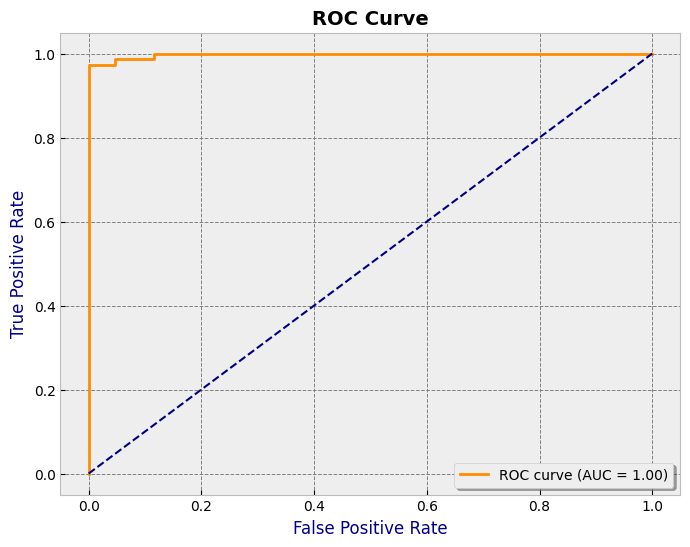

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.style.use('bmh')
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=1.5)
plt.xlabel('False Positive Rate', fontsize=12, color='darkblue')
plt.ylabel('True Positive Rate', fontsize=12, color='darkblue')
plt.title('ROC Curve', fontsize=14, weight='bold')
plt.legend(loc='lower right', fontsize=10, frameon=True, shadow=True)
plt.grid(True, linestyle='--', linewidth=0.7, color='gray')
plt.show()


Task 6: Threshold Tuning and Probability Interpretation 

● Predict the probability of the positive class. 
● Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the 
confusion matrix and F1-score change. 
● Plot the ROC curve and mark optimal threshold. 

In [25]:
thresholds_to_test = [0.3, 0.5, 0.7]

for thresh in thresholds_to_test:
    print(f"\nThreshold = {thresh}")
    y_thresh = (y_prob >= thresh).astype(int)
    cm = confusion_matrix(y_test, y_thresh)
    print("Confusion Matrix:\n", cm)
    print("F1 Score:", classification_report(y_test, y_thresh, output_dict=True)['weighted avg']['f1-score'])


Threshold = 0.3
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9558014271241044

Threshold = 0.5
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9558014271241044

Threshold = 0.7
Confusion Matrix:
 [[41  2]
 [ 1 70]]
F1 Score: 0.973621425014614


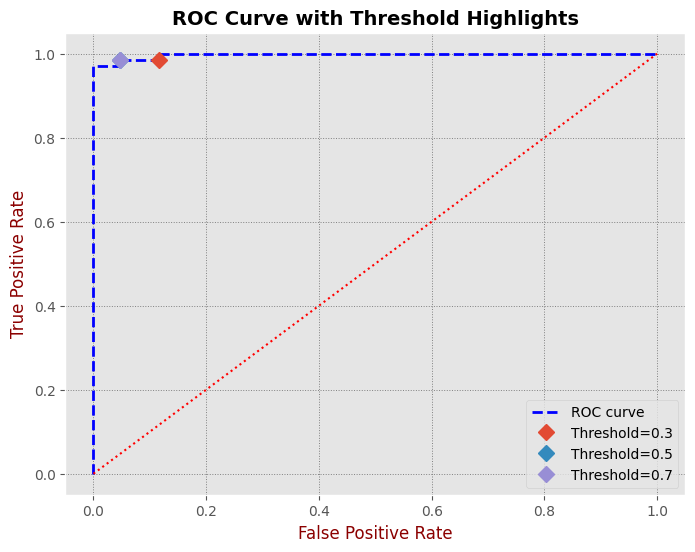

In [26]:
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(fpr, tpr, linestyle='--', color='blue', linewidth=2, label='ROC curve')
for t in thresholds_to_test:
    idx = (np.abs(thresholds - t)).argmin()
    plt.plot(fpr[idx], tpr[idx], marker='D', markersize=8, label=f'Threshold={t}', linestyle='None')
plt.plot([0, 1], [0, 1], 'r:', linewidth=1.5)
plt.xlabel('False Positive Rate', fontsize=12, color='darkred')
plt.ylabel('True Positive Rate', fontsize=12, color='darkred')
plt.title('ROC Curve with Threshold Highlights', fontsize=14, weight='bold')
plt.grid(True, linestyle=':', linewidth=0.7, color='gray')
plt.legend(loc='lower right', fontsize=10, fancybox=True)
plt.show()


Task 7: Multiclass Classification (Optional)

● Use the Iris Dataset to perform multiclass logistic regression. 
● Use one-vs-rest or multinomial strategy. 
● Evaluate model accuracy and classification report.

In [27]:
from sklearn.datasets import load_iris

In [28]:
iris = load_iris()
X, y = iris.data, iris.target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
multi_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
multi_model.fit(X_train, y_train)
y_pred = multi_model.predict(X_test)

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [31]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Part-III: General Questions


1. What are the assumptions of linear regression?


ANS.

-> Linear relationship between independent and dependent variables

-> Independence of observations

-> Homoscedasticity (equal variance of residuals)

-> Residuals are normally distributed

-> No or little multicollinearity among features




2. When should you use logistic regression instead of linear regression?


ANS.
Logistic regression is ideal when the dependent variable is categorical, particularly in binary classification scenarios like determining whether an email is spam or not. On the other hand, linear regression isn’t suitable for classification problems because it outputs continuous values.


3. What is the interpretation of coefficients in logistic regression?


ANS.
Each coefficient indicates how the log-odds of the target variable change with a one-unit increase in the corresponding feature, assuming all other features remain fixed. By exponentiating the coefficient, you obtain the odds ratio.

4. What is the difference between sigmoid and softmax functions?

ANS.

Sigmoid : is applied in binary classification problems; it transforms the output into a probability value ranging from 0 to 1.

Softmax : is used for multiclass classification tasks; it extends the sigmoid function to handle multiple classes by producing a set of probabilities that add up to 1.

5. Why is R-squared not suitable for evaluating logistic regression models?

ANS.
R-squared indicates how much of the variability in the response variable is explained by a linear regression model. Since logistic regression deals with categorical outcomes rather than continuous ones, R² isn't appropriate. Instead, evaluation metrics such as accuracy, log-loss, or ROC-AUC are more suitable.